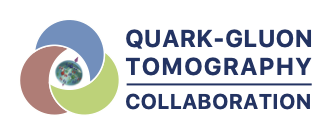

<div class="markdown-google-sans">
  <h1>This notebook shows visualization of data from QGT database</h1>
</div>

<a target="_blank" href="https://colab.research.google.com/github/prokudin/PSU_PHYS496/blob/master/database/expdata/visuals_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

As an example we will load data from CLAS publication *Phys.Rev.Lett. 115 (2015) 21, 212003* https://inspirehep.net/literature/1358400
and plot one of the experimental bins

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we read the excel file containing the data from our repository https://github.com/prokudin/PSU_PHYS496/tree/master/database

In [ ]:
df = pd.read_excel('https://github.com/prokudin/PSU_PHYS496/raw/master/database/expdata/Ref_18_Table_1.xlsx')

Show the header of the dataframe

In [ ]:
df

x    Q2     t     phi   value  stat_u  syst_u   col  \
0     0.126  1.11  0.11    7.50  0.0000  0.0000  0.0000  CLAS   
1     0.126  1.11  0.11   22.50  0.0000  0.0000  0.0000  CLAS   
2     0.126  1.11  0.11   37.50  0.0000  0.0000  0.0000  CLAS   
3     0.126  1.11  0.11   55.82  0.0000  0.0000  0.0000  CLAS   
4     0.126  1.11  0.11   68.33  8.9354  0.5418  0.7223  CLAS   
...     ...   ...   ...     ...     ...     ...     ...   ...   
2635  0.475  3.77  0.45  292.77  0.0086  0.0013  0.0020  CLAS   
2636  0.475  3.77  0.45  307.78  0.0153  0.0018  0.0020  CLAS   
2637  0.475  3.77  0.45  322.77  0.0168  0.0017  0.0019  CLAS   
2638  0.475  3.77  0.45  337.68  0.0225  0.0018  0.0023  CLAS   
2639  0.475  3.77  0.45  352.55  0.0233  0.0019  0.0015  CLAS   

                         obsv    units  target beam  energy (GeV)  
0     d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
1     d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
2     d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
3     d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
4     d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
...                       ...      ...     ...  ...           ...  
2635  d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
2636  d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
2637  d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
2638  d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  
2639  d4sigma/dQ2 dxb dt dphi  nb/GeV4  proton    e      3.417047  

[2640 rows x 13 columns]

We will choose the bin $x = 0.126$, $Q^2 = 1.11$ GeV$^2$, $-t=0.11$ GeV$^2$

In [ ]:
# choose the bin to plot
x_bin  = 0.185
Q2_bin = 1.63
t_bin  = 0.15
bin_to_plot = "x == " + str(x_bin)+ " and Q2 == " + str(Q2_bin)+ " and t == " + str(t_bin) + " and value != 0"

In [ ]:
plot_df = df.query(bin_to_plot)

Text(0, 0.5, '${d^4\\sigma}~({\\rm nb/GeV^4})$')

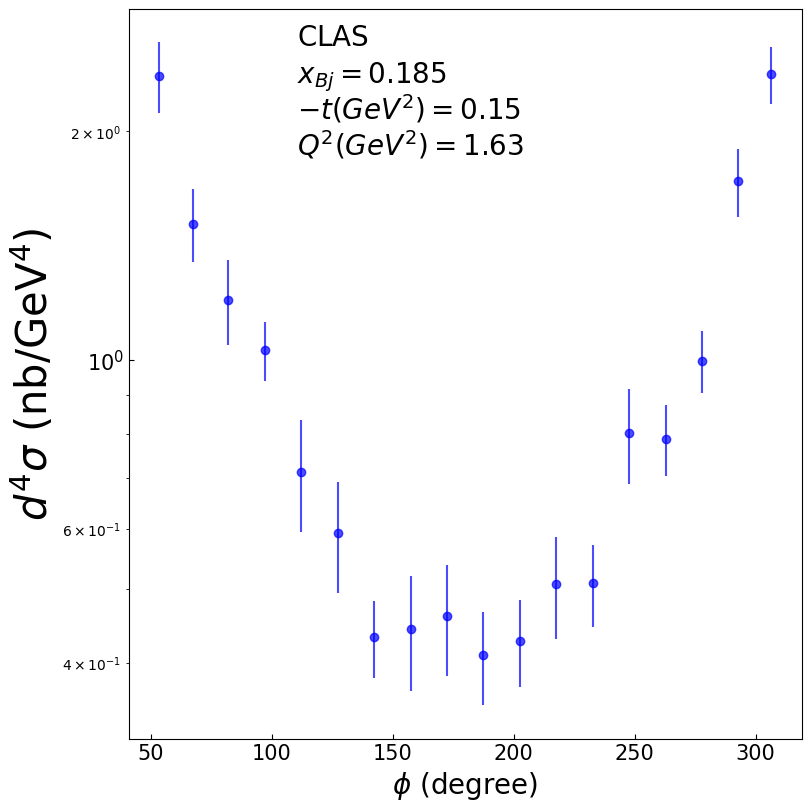

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8), constrained_layout = True)
ax.errorbar(plot_df.phi, plot_df.value,yerr=np.sqrt(plot_df.stat_u**2+ plot_df.syst_u**2),fmt='o',c='b',alpha=0.7)
ax.tick_params(direction='in',labelsize=15)
ax.set_yscale('log')
ax.text(0.25,0.95,r'$\rm CLAS$',transform=ax.transAxes,size=20)
ax.text(0.25,0.9,r'$x_{Bj} = %.3f$'%(x_bin),transform=ax.transAxes,size=20)
ax.text(0.25,0.85,r'$-t (GeV^2) = %.2f$'%(t_bin),transform=ax.transAxes,size=20)
ax.text(0.25,0.8,r'$Q^2 (GeV^2) = %.2f$'%(Q2_bin),transform=ax.transAxes,size=20)
ax.set_xlabel(r'$\phi~({\rm degree})$',size=20)
ax.set_ylabel(r'${d^4\sigma}~({\rm nb/GeV^4})$',size=30)